In [233]:
#https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels
#https://www.kaggle.com/tanyanjun/final-house-price-prediction-models
#https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm, skew #for some statistics
import statsmodels.api as sm
import statsmodels
from statsmodels.regression import linear_model


### Data Exploration and Visualization

In [356]:
#Load Data
train= pd.read_csv("Data/train_house.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [357]:
# Print column names
train.keys()
#list(train.columns) 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [358]:
train.shape

(1460, 81)

In [359]:
#train.info()

In [360]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [361]:
train.shape

(1460, 81)

In [362]:
idsUnique = len(set(train.Id))
idsUnique
#idsTotal = train.shape[0] # Number of rows
#idsTotal = train.shape[1] # Number of columns

1460

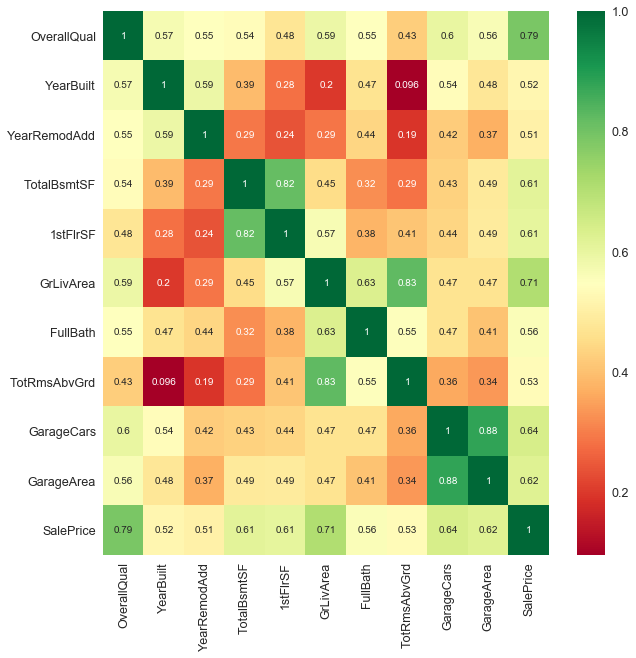

In [363]:
# To find most correlated features with SalesPrice
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5] #SalesPrice is the target
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### The Above heat map tell us that the following features play an important role in Sale Price! (OverallQual, GrLivArea, GarageCars, GarageArea)


In [364]:
#descriptive statistics summary of SalesPrice column
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


 mu = 180921.20 and sigma = 79415.29



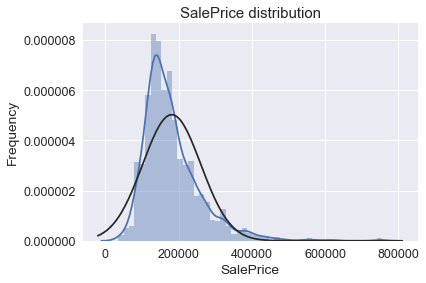

In [365]:
#Explore  SalesPrice Distribution

sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.ylabel('Frequency')
plt.title('SalePrice distribution')

plt.show()

### The above figure shows that the Sale Price does not have a normal distribution. And it has  a positive skewness.

In [366]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


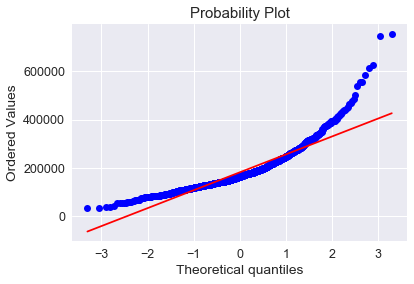

In [367]:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

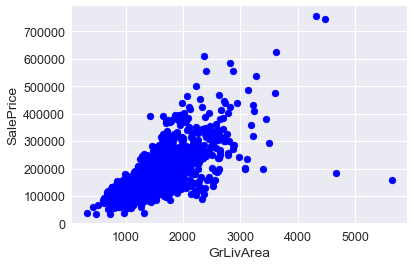

In [368]:
#
plt.scatter(y =train.SalePrice,x = train.GrLivArea,c = 'blue')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

### The above figure shows that there is a linear relationship between GrLivArea and SalePrice

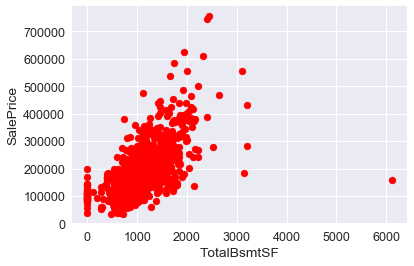

In [369]:
plt.scatter(y =train.SalePrice,x = train.TotalBsmtSF,c = 'red')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

### The above figure shows a stronger relashionship between TotalBsmtSF and SalesPrice

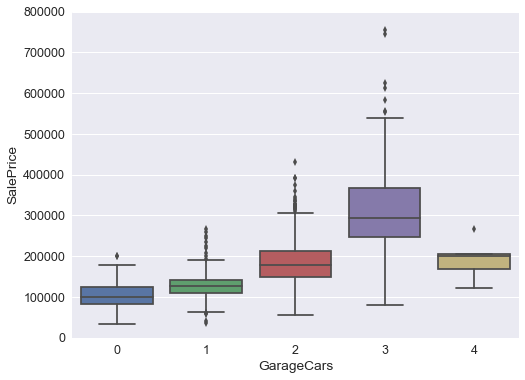

In [370]:
#box plot overallqual/saleprice
data = pd.concat([train['SalePrice'], train.GarageCars], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='GarageCars', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);


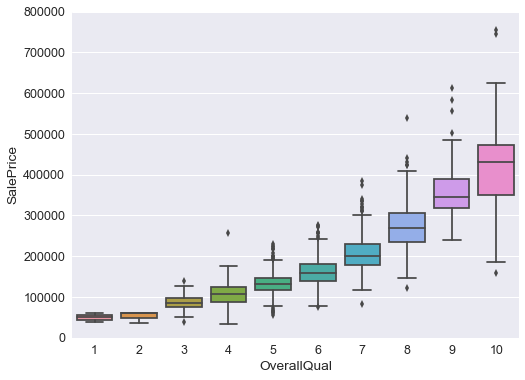

In [371]:
#box plot overallqual/saleprice
data = pd.concat([train['SalePrice'], train.OverallQual], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

### Dealing with missing data

In [372]:
train_nas = train.isnull().sum()

print(train_nas[train_nas > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [373]:
#dealing with missing data
train = train.drop((missing_data[missing_data['Total'] > 1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max() #just checking that there's no missing data missing...

1452


 mu = 180930.39 and sigma = 79441.73



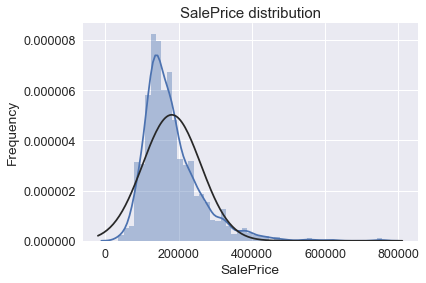

Skewness: 1.881943
Kurtosis: 6.529263


In [374]:
#Explore  SalesPrice Distribution

sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.ylabel('Frequency')
plt.title('SalePrice distribution')

plt.show()

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

In [375]:
train['LogSalePrice'] = train['SalePrice'].map(lambda x : np.log(x)) 


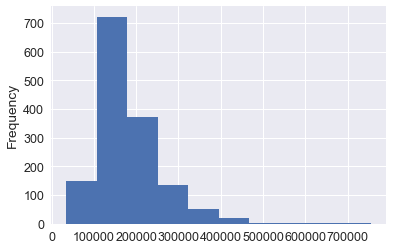

In [376]:
train['SalePrice'].plot.hist()

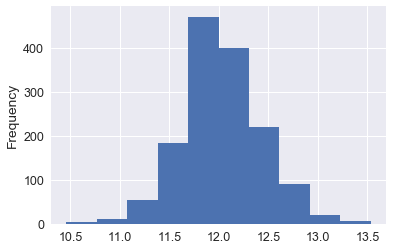

In [377]:
train['LogSalePrice'].plot.hist()


 mu = 180930.39 and sigma = 79441.73



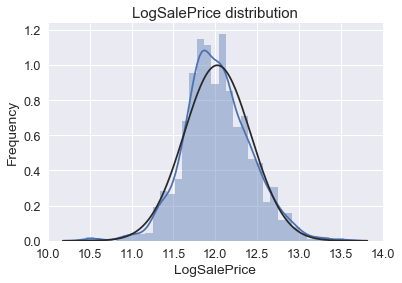

In [378]:
sns.distplot(train['LogSalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.ylabel('Frequency')
plt.title('LogSalePrice distribution')

plt.show()

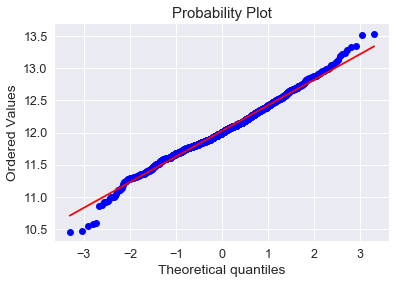

In [379]:
res = stats.probplot(train['LogSalePrice'], plot=plt)

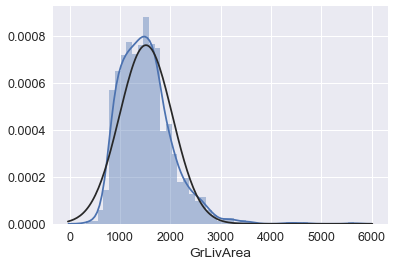

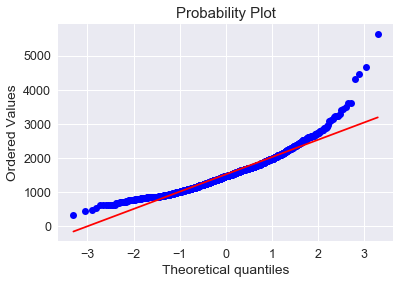

In [380]:
#histogram and normal probability plot
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

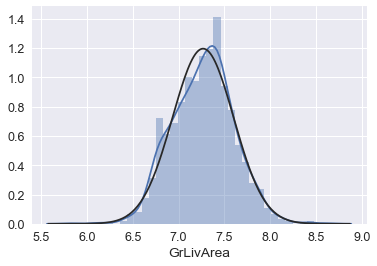

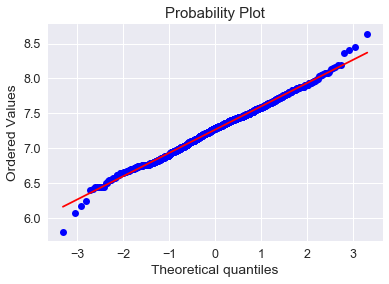

In [381]:
#data transformation
train['GrLivArea'] = np.log(train['GrLivArea'])

#transformed histogram and normal probability plot
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

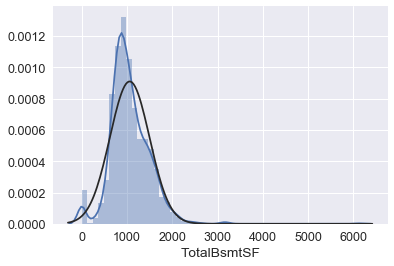

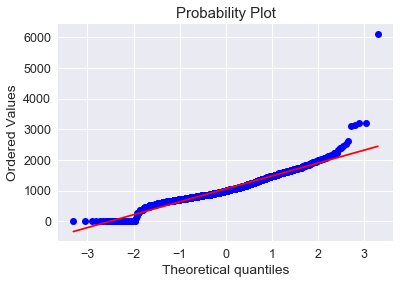

In [382]:
#histogram and normal probability plot
sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

In [383]:
idsTotal = train.shape[1]
idsTotal
columns_list= list(train.columns.values)
len(columns_list)

82

In [384]:
df = train[columns_list]
del df['SalePrice']
del df['LogSalePrice']
df.shape

(1459, 80)

In [385]:
df_num= df.select_dtypes([np.number])
train_num= train.select_dtypes([np.number])
df_num.shape

(1459, 37)

In [386]:
new_clolumns_list = list(df_num.columns.values)
X = df_num
Y = train['SalePrice']

X = sm.add_constant(X)
model = sm.OLS(Y, X, missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     128.5
Date:                Thu, 27 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:17:56   Log-Likelihood:                -13344.
No. Observations:                1120   AIC:                         2.676e+04
Df Residuals:                    1083   BIC:                         2.695e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.065e+05    1.7e+06     -0.063      0.950   -3.45e+06    3.23e+06
Id               -1.3641      2.658     -0.513      0.608      -6.579       3.851
MSSubClass     -198.9779     34.480     -5.771      0.000    -266.632    -131.324
LotFrontage    -126.0233     61.372     -2.053      0.040    -246.444      -5.603
LotArea           0.5231      0.158      3.319      0.001       0.214       0.832
OverallQual    1.913e+04   1496.759     12.784      0.000    1.62e+04    2.21e+04
OverallCond    5052.1900   1369.408      3.689      0.000    2365.196    7739.184
YearBuilt       318.6748     87.583      3.639      0.000     146.823     490.526
YearRemodAdd    126.8154     86.692      1.463      0.144     -43.288     296.919
MasVnrArea       29.6145      7.070      4.189      0.000      15.741      43.488
BsmtFinSF1        8.8495      3.152      2.807      0.005       2.664      15.035
BsmtFinSF2        0.5995      5.580      0.107      0.914     -10.350      11.549
BsmtUnfSF        -2.4961      2.934     -0.851      0.395      -8.254       3.262
TotalBsmtSF       6.9528      4.237      1.641      0.101      -1.361      15.267
1stFlrSF         63.7370     11.403      5.589      0.000      41.362      86.112
2ndFlrSF         62.2788      9.778      6.369      0.000      43.092      81.465
LowQualFinSF     48.0867     28.820      1.669      0.096      -8.463     104.637
GrLivArea     -3.165e+04   1.55e+04     -2.043      0.041    -6.2e+04   -1246.382
BsmtFullBath   9638.5432   3206.704      3.006      0.003    3346.487    1.59e+04
BsmtHalfBath   2830.5705   5070.098      0.558      0.577   -7117.758    1.28e+04
FullBath       6439.2029   3565.046      1.806      0.071    -555.976    1.34e+04
HalfBath         26.9106   3368.838      0.008      0.994   -6583.277    6637.098
BedroomAbvGr  -9524.8712   2177.798     -4.374      0.000   -1.38e+04   -5251.690
KitchenAbvGr  -2.126e+04   6711.829     -3.167      0.002   -3.44e+04   -8087.951
TotRmsAbvGrd   5753.5415   1493.547      3.852      0.000    2822.968    8684.115
Fireplaces     4931.8584   2202.120      2.240      0.025     610.954    9252.763
GarageYrBlt     -53.6585     91.003     -0.590      0.556    -232.221     124.904
GarageCars     1.689e+04   3487.340      4.844      0.000    1.01e+04    2.37e+04
GarageArea        6.2621     12.118      0.517      0.605     -17.516      30.040
WoodDeckSF       20.9948     10.014      2.096      0.036       1.345      40.645
OpenPorchSF      -3.0409     19.473     -0.156      0.876     -41.249      35.168
EnclosedPorch    11.4630     20.704      0.554      0.580     -29.162      52.088
3SsnPorch        38.5152     37.619      1.024      0.306     -35.299     112.330
ScreenPorch      60.4918     20.420      2.962      0.003      20.424     100.560
PoolArea        -74.6705     30.651     -2.436   

In [394]:
#convert categorical variable into dummy
train_dummy = pd.get_dummies(train)
train_num= train_dummy.select_dtypes([np.number])
columns_list_1= list(train_num.columns.values)
#columns_list_1

In [398]:
del train_num['SalePrice']
X = train_num
Y = train['SalePrice']

X = sm.add_constant(X)
model = sm.OLS(Y, X, missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     170.6
Date:                Thu, 27 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:24:28   Log-Likelihood:                -12106.
No. Observations:                1120   AIC:                         2.470e+04
Df Residuals:                     877   BIC:                         2.592e+04
Df Model:                         242                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.595e+05   8.39e+04     -1.901      0.058   -3.24e+05    5134.063
Id                        2.3385      1.078      2.169      0.030       0.222       4.455
MSSubClass              106.6202     71.081      1.500      0.134     -32.888     246.129
LotFrontage              -5.1266     32.648     -0.157      0.875     -69.204      58.951
LotArea                   0.1901      0.089      2.129      0.034       0.015       0.365
OverallQual             826.2119    766.804      1.077      0.282    -678.774    2331.197
OverallCond           -2364.5843    685.618     -3.449      0.001   -3710.228   -1018.941
YearBuilt                20.7389     58.789      0.353      0.724     -94.645     136.123
YearRemodAdd            -21.9671     41.161     -0.534      0.594    -102.753      58.819
MasVnrArea               14.6226      3.904      3.745      0.000       6.959      22.286
BsmtFinSF1                6.1083      2.103      2.905      0.004       1.981      10.236
BsmtFinSF2                0.5675      4.347      0.131      0.896      -7.965       9.100
BsmtUnfSF                -0.8099      2.034     -0.398      0.691      -4.803       3.183
TotalBsmtSF               5.8660      3.039      1.930      0.054      -0.098      11.830
1stFlrSF                 85.4877      6.831     12.515      0.000      72.081      98.895
2ndFlrSF                 81.4378      5.490     14.833      0.000      70.662      92.213
LowQualFinSF             98.0863     18.353      5.344      0.000      62.065     134.107
GrLivArea              -1.38e+05   9041.921    -15.261      0.000   -1.56e+05    -1.2e+05
BsmtFullBath          -1899.3743   1399.118     -1.358      0.175   -4645.385     846.636
BsmtHalfBath            159.3603   2151.702      0.074      0.941   -4063.727    4382.448
FullBath               2248.9457   1610.998      1.396      0.163    -912.915    5410.807
HalfBath              -1101.3813   1506.072     -0.731      0.465   -4057.309    1854.546
BedroomAbvGr          -3076.0672   1017.112     -3.024      0.003   -5072.326   -1079.809
KitchenAbvGr          -3449.5173   4846.459     -0.712      0.477    -1.3e+04    6062.496
TotRmsAbvGrd            574.2948    678.404      0.847      0.397    -757.190    1905.779
Fireplaces             1592.9231   1884.367      0.845      0.398   -2105.472    5291.318
GarageYrBlt             -50.7678     42.778     -1.187      0.236    -134.727      33.191
GarageCars            -1646.3506   1559.552     -1.056      0.291   -4707.241    1414.540
GarageArea                0.4811      5.442      0.088      0.930     -10.200      11.162
WoodDeckSF               -6.2595      4.267     -1.467      0.143     -14.635       2.116
OpenPorchSF             -10.6704      8.690     -1.228      0.220     -27.727       6.386
EnclosedPorch          